# Importing Libraries

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Importing the Dataset

In [25]:
dataset = pd.read_csv("/home/akanksha/Downloads/Position_Salaries.csv")
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,2].values

In [26]:
y = y.reshape(len(y),1) #Because feature scalling class only accepts 2D arrays

# Feature Scalling

In [27]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [28]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [29]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [30]:
y = y.reshape(len(y),1)

# Training a SVR Model on a Whole Dataset

In [31]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(x,y)

/home/akanksha/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predict a New Result

In [32]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

# Visualising the SVR Results

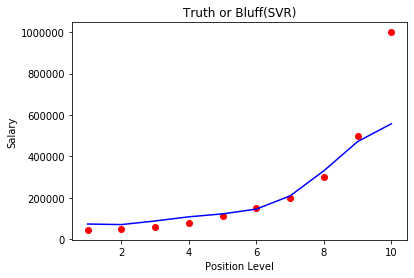

In [35]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = "red")
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = "blue")
plt.title("Truth or Bluff(SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve)

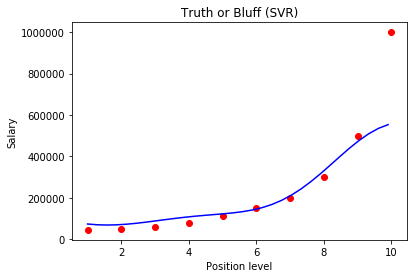

In [38]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x_grid), sc_y.inverse_transform(regressor.predict(x_grid)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()